In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./p_lungcancer_all_add2.csv')
df2 = df.copy()

In [3]:
df.columns

Index(['AGE', 'Stage', 'Tumor_Size', 'lymph_node_meta_size', 'Adenocarcinoma',
       'Large_cell_carcinoma', 'Squamous_cell_carcinoma', 'TX', 'T0', 'T1',
       'T1a', 'T1b', 'T1c', 'T2', 'T2a', 'T2b', 'T3', 'T4', 'N0', 'N1', 'N2',
       'N3', 'M0', 'M1a', 'M1b', 'M1c', 'Smoke', 'Height', 'Weight',
       'FEV1_FVC_P', 'DLCO_VA_P', 'Operation', 'Chemotherapy',
       'Radiation_Therapy', 'Death', 'Survival_period', 'EGFR_0', 'EGFR_1',
       'EGFR_99', 'Drink_1', 'Drink_2', 'Drink_3', 'Drink_99'],
      dtype='object')

In [4]:
df.Stage.value_counts()

Stage
Stage 4    7151
Stage 1    3338
Stage 3    2765
Stage 2    1743
Stage 0       3
Name: count, dtype: int64

In [5]:
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

In [6]:
df.head()

,AGE,Stage,Tumor_Size,lymph_node_meta_size,Adenocarcinoma,Large_cell_carcinoma,Squamous_cell_carcinoma,TX,T0,T1,...,Death,Survival_period,EGFR_0,EGFR_1,EGFR_99,Drink_1,Drink_2,Drink_3,Drink_99,BMI
0,72,Stage 1,0.0,0.0,1,1,0,1,0,0,...,0,157,False,False,True,False,False,False,True,33.822654
1,66,Stage 4,2.0,4.5,1,0,0,0,0,1,...,0,567,False,False,True,False,False,False,True,18.984376
2,75,Stage 4,0.0,0.0,1,1,0,1,0,0,...,0,253,False,False,True,False,False,True,False,25.596524
3,77,Stage 4,2.0,8.0,1,0,1,0,0,1,...,0,266,False,True,False,False,True,False,False,31.486033
4,85,Stage 1,2.5,0.0,1,0,0,0,0,0,...,0,470,False,False,True,False,True,False,False,14.922211


In [7]:
#T0는 종양이 존재하지 않음을 의미. 즉, 종양이 없다는 정보이기 때문에 다른 T 값들과 합산하면 의미가 왜곡될 우려 있음.
#TX는 종양의 크기를 정확하게 알 수 없다는 의미, 사실상 정보가 없다고 볼 수 있음. 
# 따라서 TX를 다른 T 값들과 합산하면 제대로 된 의미를 갖지 못함.
# T0와 TX는 제외하고 T1~T4 값만 합산
df['T_sum'] = df[['T1', 'T1a', 'T1b', 'T1c', 'T2', 'T2a', 'T2b', 'T3', 'T4']].sum(axis=1)

In [8]:
# 각 T 항목에 대해 사이즈 곱하기
df['T_sized_sum'] = (df['T1'] * 2 +
                        df['T1a'] * 0.5 +
                        df['T1b'] * 1.5 +
                        df['T1c'] * 2.5 +
                        df['T2'] * 4 +
                        df['T2a'] * 3.5 +
                        df['T2b'] * 4.5 +
                        df['T3'] * 6 +
                        df['T4'] * 8.5)

In [9]:
# 각 N 항목에 대해 원하는 사이즈 곱하기 (2, 4.5, 8)
df['N_sized_sum'] = (df['N1'] * 2 +
                        df['N2'] * 4.5 +
                        df['N3'] * 8)

In [10]:
# N 항목 합산하기
df['N_sum'] = df['N1'] + df['N2'] + df['N3']

In [11]:
# M 항목 합산하기
df['M_sum'] = df['M1a'] + df['M1b'] + df['M1c']

In [12]:
# 각 T 항목에 대해 원하는 가중치 곱하기
df['T_weighted_sum'] = (df['T1'] * 1 +
                        df['T1a'] * 1 +
                        df['T1b'] * 1 +
                        df['T1c'] * 1 +
                        df['T2'] * 1 +
                        df['T2a'] * 1 +
                        df['T2b'] * 1 +
                        df['T3'] * 2 +
                        df['T4'] * 3)

In [13]:
# 각 N 항목에 대해 원하는 가중치 곱하기 (2, 2.5,3)
df['N_weighted_sum'] = (df['N1'] * 2 +
                        df['N2'] * 2.5 +
                        df['N3'] * 3)

In [14]:
# 각 M 항목에 대해 원하는 가중치 곱하기 (3,4,5)
df['M_weighted_sum'] = (df['M1a'] * 3 +
                        df['M1b'] * 4 +
                        df['M1c'] * 5)

In [15]:
df.head()

,AGE,Stage,Tumor_Size,lymph_node_meta_size,Adenocarcinoma,Large_cell_carcinoma,Squamous_cell_carcinoma,TX,T0,T1,...,Drink_99,BMI,T_sum,T_sized_sum,N_sized_sum,N_sum,M_sum,T_weighted_sum,N_weighted_sum,M_weighted_sum
0,72,Stage 1,0.0,0.0,1,1,0,1,0,0,...,True,33.822654,0,0.0,0.0,0,0,0,0.0,0
1,66,Stage 4,2.0,4.5,1,0,0,0,0,1,...,True,18.984376,1,2.0,4.5,1,1,1,2.5,4
2,75,Stage 4,0.0,0.0,1,1,0,1,0,0,...,False,25.596524,0,0.0,0.0,0,1,0,0.0,4
3,77,Stage 4,2.0,8.0,1,0,1,0,0,1,...,False,31.486033,1,2.0,10.0,2,1,1,5.0,3
4,85,Stage 1,2.5,0.0,1,0,0,0,0,0,...,False,14.922211,1,2.5,0.0,0,0,1,0.0,0


In [16]:
from sklearn.preprocessing import OrdinalEncoder

# 'stage' 컬럼에 대해 순서 지정 (1기 → 4기)
stage_order = [['Stage 0','Stage 1', 'Stage 2', 'Stage 3', 'Stage 4']]

# OrdinalEncoder 객체 생성 및 적용
encoder = OrdinalEncoder(categories=stage_order)
df['Stage'] = encoder.fit_transform(df[['Stage']])

In [17]:
df.head()

,AGE,Stage,Tumor_Size,lymph_node_meta_size,Adenocarcinoma,Large_cell_carcinoma,Squamous_cell_carcinoma,TX,T0,T1,...,Drink_99,BMI,T_sum,T_sized_sum,N_sized_sum,N_sum,M_sum,T_weighted_sum,N_weighted_sum,M_weighted_sum
0,72,1.0,0.0,0.0,1,1,0,1,0,0,...,True,33.822654,0,0.0,0.0,0,0,0,0.0,0
1,66,4.0,2.0,4.5,1,0,0,0,0,1,...,True,18.984376,1,2.0,4.5,1,1,1,2.5,4
2,75,4.0,0.0,0.0,1,1,0,1,0,0,...,False,25.596524,0,0.0,0.0,0,1,0,0.0,4
3,77,4.0,2.0,8.0,1,0,1,0,0,1,...,False,31.486033,1,2.0,10.0,2,1,1,5.0,3
4,85,1.0,2.5,0.0,1,0,0,0,0,0,...,False,14.922211,1,2.5,0.0,0,0,1,0.0,0


In [18]:
# #Smoke에 원핫 인코딩하기
# df = pd.get_dummies(data = df, columns=['Smoke'], drop_first=True)

In [19]:
#범주형을 제외한 컬럼에 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Tumor_Size', 'lymph_node_meta_size','Height','Weight','FEV1_FVC_P',
        'DLCO_VA_P','AGE','Survival_period','BMI', 
        'T_sum','N_sum','M_sum','T_weighted_sum','N_weighted_sum','M_weighted_sum','T_sized_sum','N_sized_sum']] = scaler.fit_transform(df[['Tumor_Size', 'lymph_node_meta_size','Height','Weight',
                           'FEV1_FVC_P','DLCO_VA_P','AGE','Survival_period','BMI',
                          'T_sum','N_sum','M_sum',
                           'T_weighted_sum','N_weighted_sum','M_weighted_sum','T_sized_sum','N_sized_sum']])

In [25]:
#df 컬럼 확인
df.columns

Index(['AGE', 'Stage', 'Tumor_Size', 'lymph_node_meta_size', 'Adenocarcinoma',
       'Large_cell_carcinoma', 'Squamous_cell_carcinoma', 'TX', 'T0', 'T1',
       'T1a', 'T1b', 'T1c', 'T2', 'T2a', 'T2b', 'T3', 'T4', 'N0', 'N1', 'N2',
       'N3', 'M0', 'M1a', 'M1b', 'M1c', 'Smoke', 'Height', 'Weight',
       'FEV1_FVC_P', 'DLCO_VA_P', 'Operation', 'Chemotherapy',
       'Radiation_Therapy', 'Death', 'Survival_period', 'EGFR_0', 'EGFR_1',
       'EGFR_99', 'Drink_1', 'Drink_2', 'Drink_3', 'Drink_99', 'BMI', 'T_sum',
       'T_sized_sum', 'N_sized_sum', 'N_sum', 'M_sum', 'T_weighted_sum',
       'N_weighted_sum', 'M_weighted_sum'],
      dtype='object')

In [ ]:
# EGFR값을 동시에 변환
df['EGFR_status'] = df['EGFR_status'].replace({
     'EGFR_1': 1, # EGFR_1을 1로 변경
    'EGFR_0': 0,  # EGFR_2를 2로 변경
    'EGFR_99': 99  # EGFR_99를 99로 변경
})

# 결과 확인
print(df['EGFR_status'].unique())  # 변환된 값들을 확인


[99  1  0]


0        99
1        99
2        99
3         1
4        99
         ..
14995    99
14996    99
14997     0
14998     0
14999     0
Name: EGFR_status, Length: 15000, dtype: int64

C:\Users\은표\AppData\Local\Temp\ipykernel_19524\4269409661.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Smoke', y='EGFR_1', palette='viridis')


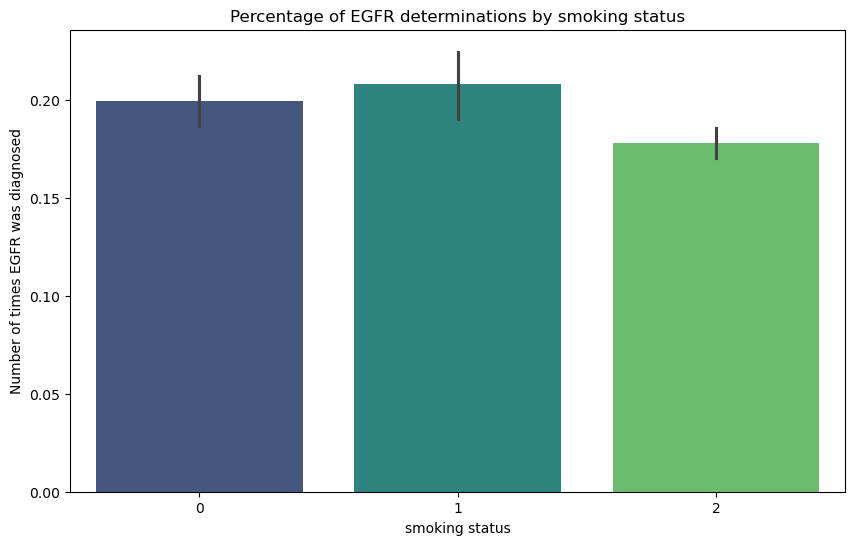

In [23]:
# 시각화: 흡연 상태에 따른 EGFR 돌연변이 판정 비율
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Smoke', y='EGFR_1', palette='viridis')
plt.title('Percentage of EGFR determinations by smoking status')
plt.xlabel('smoking status')
plt.ylabel('Number of times EGFR was diagnosed')
plt.show()

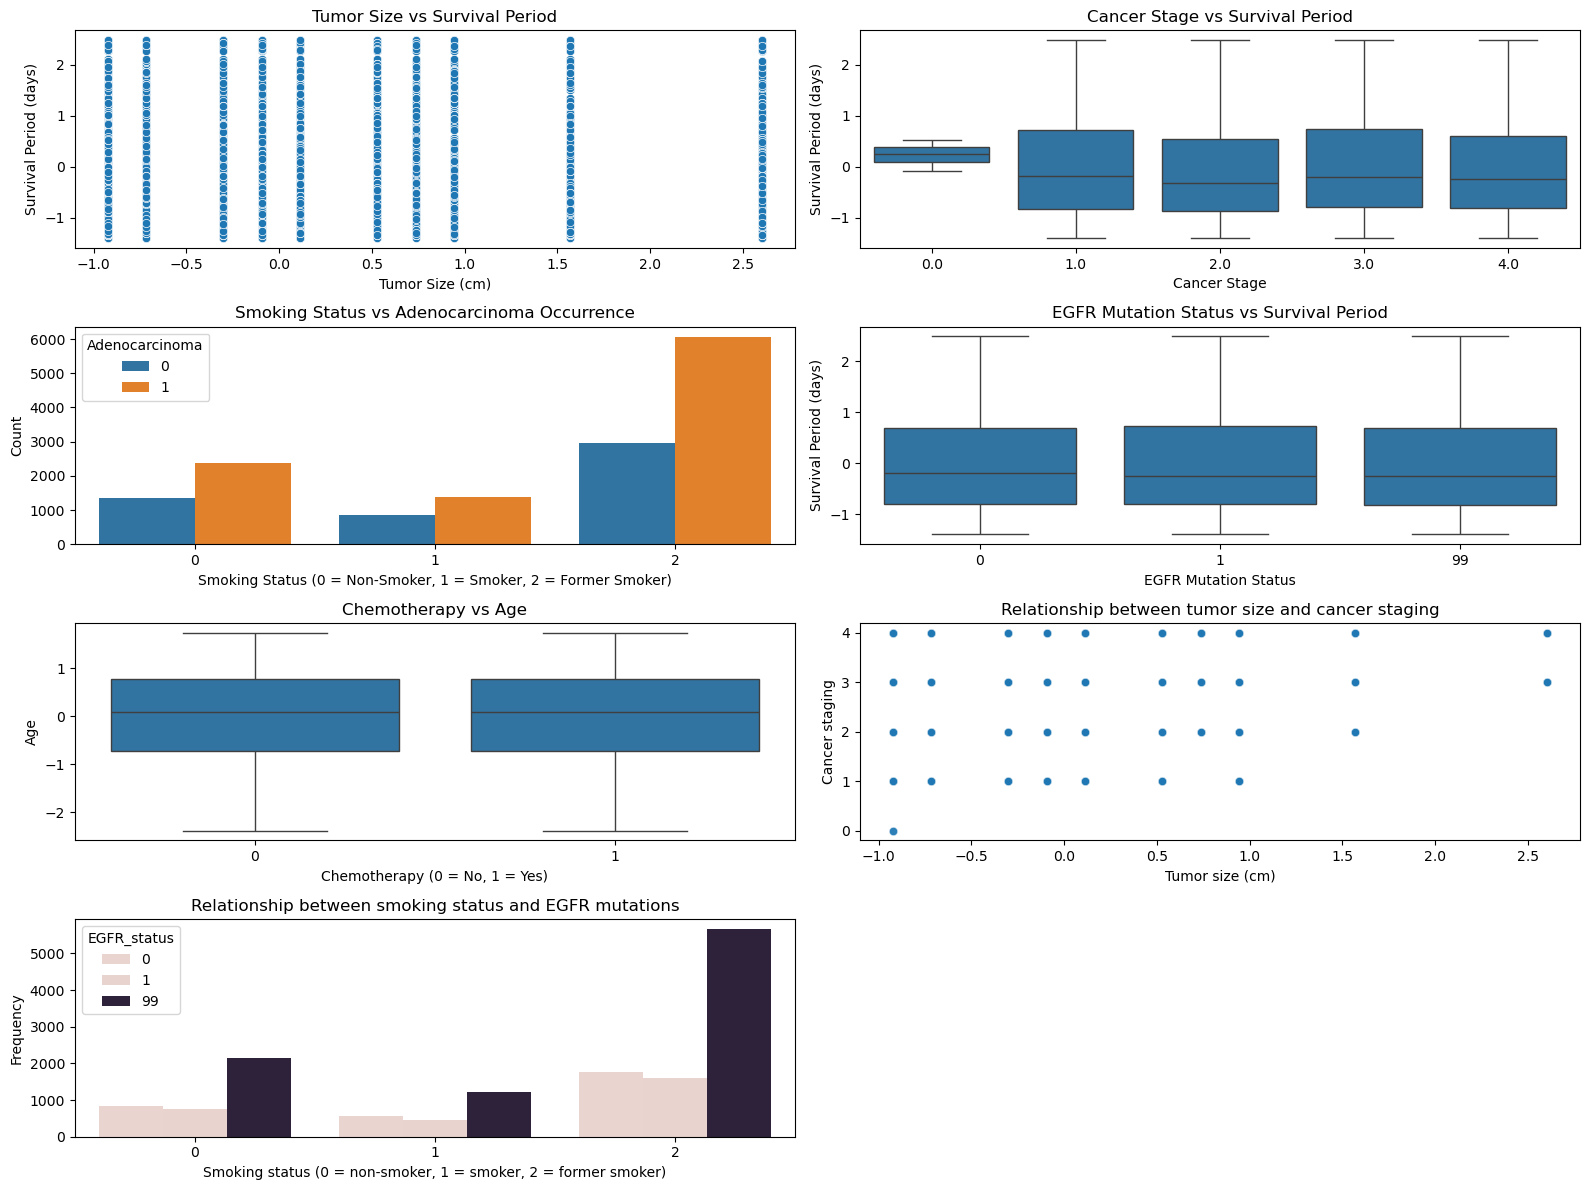

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))

# 종양 크기와 생존 기간 간의 관계 시각화
plt.subplot(4, 2, 1)
sns.scatterplot(data=df, x='Tumor_Size', y='Survival_period')
plt.title('Tumor Size vs Survival Period')
plt.xlabel('Tumor Size (cm)')
plt.ylabel('Survival Period (days)')


# 암 병기와 생존율 간의 관계 시각화
plt.subplot(4, 2, 2)
sns.boxplot(data=df, x='Stage', y='Survival_period')
plt.title('Cancer Stage vs Survival Period')
plt.xlabel('Cancer Stage')
plt.ylabel('Survival Period (days)')


# 흡연 여부와 암의 유형 간의 관계 시각화
plt.subplot(4, 2, 3)
sns.countplot(data=df, x='Smoke', hue='Adenocarcinoma')
plt.title('Smoking Status vs Adenocarcinoma Occurrence')
plt.xlabel('Smoking Status (0 = Non-Smoker, 1 = Smoker, 2 = Former Smoker)')
plt.ylabel('Count')
plt.legend(title='Adenocarcinoma')


# EGFR 돌연변이와 생존 기간 간의 관계 시각화
plt.subplot(4, 2, 4)
sns.boxplot(data=df, x='EGFR_status', y='Survival_period')
plt.title('EGFR Mutation Status vs Survival Period')
plt.xlabel('EGFR Mutation Status')
plt.ylabel('Survival Period (days)')


# 연령과 치료 방법의 선택 간의 관계 시각화
plt.subplot(4, 2, 5)
sns.boxplot(data=df, x='Chemotherapy', y='AGE')
plt.title('Chemotherapy vs Age')
plt.xlabel('Chemotherapy (0 = No, 1 = Yes)')
plt.ylabel('Age')


# 종양 크기와 암 병기 간의 관계 시각화
plt.subplot(4, 2, 6)
sns.scatterplot(data=df, x='Tumor_Size', y='Stage', alpha=0.6)
plt.title('Relationship between tumor size and cancer staging')
plt.xlabel('Tumor size (cm)')
plt.ylabel('Cancer staging')

# EGFR 돌연변이와 흡연 여부 간의 관계 시각화 (막대 그래프)
plt.subplot(4, 2, 7)
sns.countplot(data=df, x='Smoke', hue='EGFR_status')
plt.title('Relationship between smoking status and EGFR mutations')
plt.xlabel('Smoking status (0 = non-smoker, 1 = smoker, 2 = former smoker)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

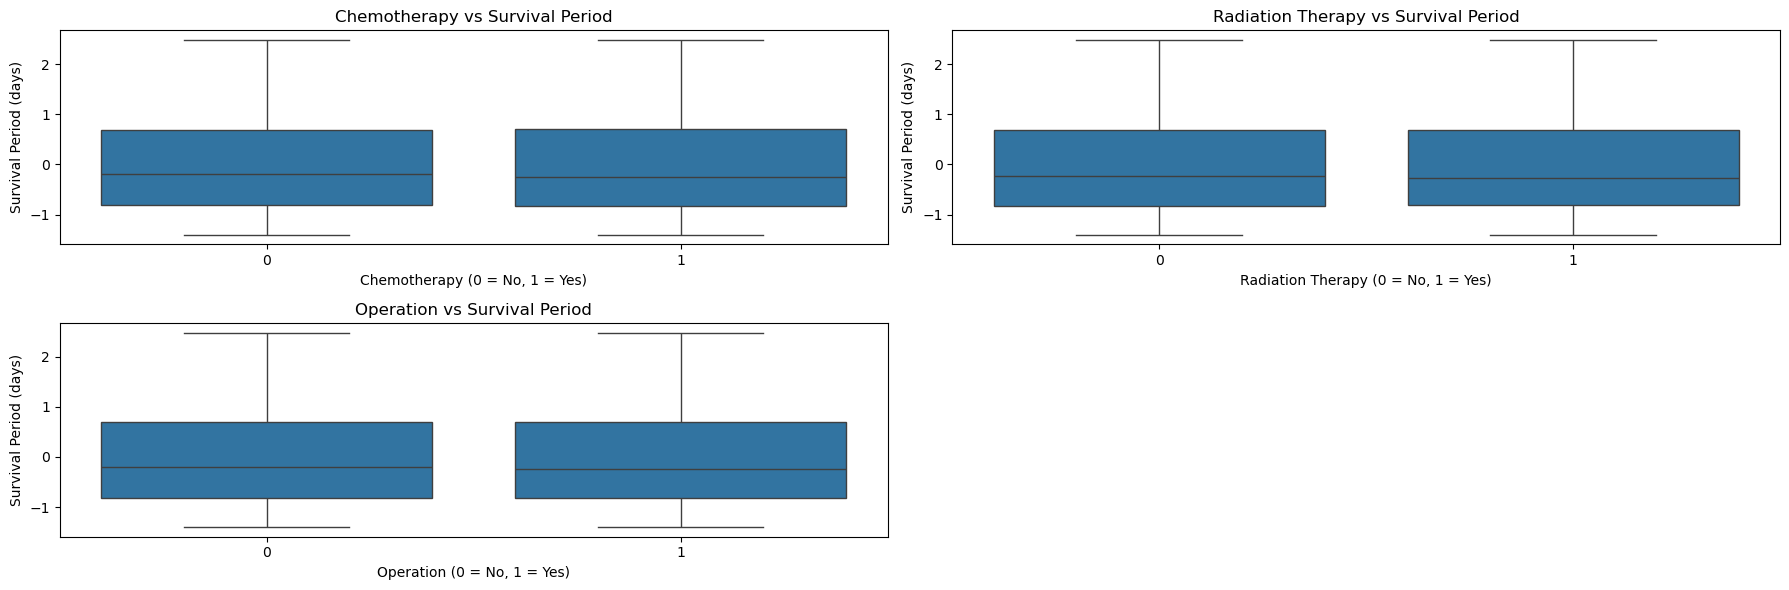

In [ ]:
# 치료 방법과 생존 기간 간의 관계 시각화
plt.figure(figsize=(18, 6))

# 화학요법 vs 생존 기간
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Chemotherapy', y='Survival_period')
plt.title('Chemotherapy vs Survival Period')
plt.xlabel('Chemotherapy (0 = No, 1 = Yes)')
plt.ylabel('Survival Period (days)')

# 방사선 치료 vs 생존 기간
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Radiation_Therapy', y='Survival_period')
plt.title('Radiation Therapy vs Survival Period')
plt.xlabel('Radiation Therapy (0 = No, 1 = Yes)')
plt.ylabel('Survival Period (days)')

# 수술 vs 생존 기간
plt.subplot(1, 2, 3)
sns.boxplot(data=df, x='Operation', y='Survival_period')
plt.title('Operation vs Survival Period')
plt.xlabel('Operation (0 = No, 1 = Yes)')
plt.ylabel('Survival Period (days)')


plt.tight_layout()
plt.show()